In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import os
import cv2
from tqdm import tqdm
from astropy.io import fits

100%|██████████| 4501/4501 [00:03<00:00, 1296.19it/s]


13500


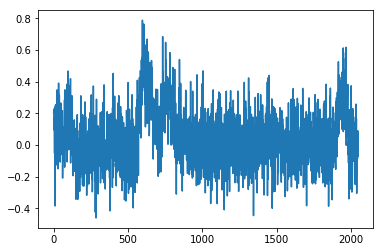

In [7]:
# Create path to data
DATADIR = "/Users/quijeremy/desktop/senior_thesis/spectra_data/training_data_clean"

CATEGORIES = ["spectra_0.55HM12_zr9_z5.000_1D", "spectra_1.0HM12_zr9_z5.000_1D", "spectra_1.8HM12_zr9_z5.000_1D"]

# Create training data
training_data = []
for category in CATEGORIES:  # do 3 spectra

    path = os.path.join(DATADIR,category)  # create path to each spectra
    class_num = CATEGORIES.index(category)  # get the classification

    for img in tqdm(os.listdir(path)):  # iterate over each image per spectra
        noise = np.random.normal(0, 0.15, 2048)
        try:
            img_array = fits.getdata(path + '/' + img) + noise # convert to array
            training_data.append([img_array, class_num])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
        #except OSError as e:
        #    print("OSErrroBad img most likely", e, os.path.join(path,img))
        #except Exception as e:
        #    print("general exception", e, os.path.join(path,img))

# Make sure all data was imported
print(len(training_data))

# Plot a sample
plt.plot(img_array)
plt.show()

In [16]:
# Shuffle data to avoid overfitting
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

2
0
1
0
1
0
0
2
1
0


In [17]:
# Create feature and label arrays
X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)

print(features)
print(label)

# Make sure reshape is correct
print(X[0].reshape(-1, 2048, 1))

X = np.array(X).reshape(-1, 2048, 1)

[-0.15005975 -0.21793953 -0.07153258 ...  0.09630957 -0.26332888
 -0.19612872]
0
[[[-0.09231846]
  [-0.10788053]
  [-0.03736438]
  ...
  [ 0.05473044]
  [-0.0023041 ]
  [-0.28430352]]]


In [18]:
# Create files to call later
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [19]:
# Import data
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)